In [2]:
# !pip install pandas

In [3]:
## importing necessary library first
import numpy as np # for numerical calculation
import pandas as pd # for doing dataframe operation



In [4]:
## Loading dataframe 
df = pd.read_csv('datasets_33080_1320127_CAR DETAILS FROM CAR DEKHO.csv')
df.head()


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [5]:
df.shape

(4340, 8)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
name             4340 non-null object
year             4340 non-null int64
selling_price    4340 non-null int64
km_driven        4340 non-null int64
fuel             4340 non-null object
seller_type      4340 non-null object
transmission     4340 non-null object
owner            4340 non-null object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [7]:
## to know types of catagorical values
print(df['fuel'].unique())
print(df['seller_type'].unique())
print(df['transmission'].unique())
print(df['owner'].unique())

['Petrol' 'Diesel' 'CNG' 'LPG' 'Electric']
['Individual' 'Dealer' 'Trustmark Dealer']
['Manual' 'Automatic']
['First Owner' 'Second Owner' 'Fourth & Above Owner' 'Third Owner'
 'Test Drive Car']


In [8]:
##check missing or null values in the data set 
df.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

In [9]:
## Description in mathematical terms
df.describe()
df.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner'],
      dtype='object')

In [10]:
final_dataset = df[['year', 'selling_price', 'km_driven', 'fuel', 'seller_type','transmission', 'owner']]

In [11]:
final_dataset.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [12]:
final_dataset['current year'] =2020

In [13]:
final_dataset.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,current year
0,2007,60000,70000,Petrol,Individual,Manual,First Owner,2020
1,2007,135000,50000,Petrol,Individual,Manual,First Owner,2020
2,2012,600000,100000,Diesel,Individual,Manual,First Owner,2020
3,2017,250000,46000,Petrol,Individual,Manual,First Owner,2020
4,2014,450000,141000,Diesel,Individual,Manual,Second Owner,2020


In [14]:
final_dataset['no. of years'] = final_dataset['current year'] - final_dataset['year']

In [15]:
final_dataset.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,current year,no. of years
0,2007,60000,70000,Petrol,Individual,Manual,First Owner,2020,13
1,2007,135000,50000,Petrol,Individual,Manual,First Owner,2020,13
2,2012,600000,100000,Diesel,Individual,Manual,First Owner,2020,8
3,2017,250000,46000,Petrol,Individual,Manual,First Owner,2020,3
4,2014,450000,141000,Diesel,Individual,Manual,Second Owner,2020,6


In [16]:
final_dataset.drop(['year','current year'],axis = 1,inplace = True)

In [17]:
final_dataset.head()

,selling_price,km_driven,fuel,seller_type,transmission,owner,no. of years
0,60000,70000,Petrol,Individual,Manual,First Owner,13
1,135000,50000,Petrol,Individual,Manual,First Owner,13
2,600000,100000,Diesel,Individual,Manual,First Owner,8
3,250000,46000,Petrol,Individual,Manual,First Owner,3
4,450000,141000,Diesel,Individual,Manual,Second Owner,6


In [18]:
final_dataset = pd.get_dummies(final_dataset,drop_first=True)

In [19]:
final_dataset.head()

,selling_price,km_driven,no. of years,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,60000,70000,13,0,0,0,1,1,0,1,0,0,0,0
1,135000,50000,13,0,0,0,1,1,0,1,0,0,0,0
2,600000,100000,8,1,0,0,0,1,0,1,0,0,0,0
3,250000,46000,3,0,0,0,1,1,0,1,0,0,0,0
4,450000,141000,6,1,0,0,0,1,0,1,0,1,0,0


In [20]:
final_dataset.corr()

,selling_price,km_driven,no. of years,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
selling_price,1.000000,-0.192289,-0.413922,0.282947,-0.005095,-0.042434,-0.269453,-0.236798,0.110176,-0.530205,-0.078725,-0.161986,0.048799,-0.111326
km_driven,-0.192289,1.000000,0.419688,0.285396,-0.001372,0.036652,-0.291139,0.182663,-0.089858,0.120226,0.097349,0.195203,-0.083445,0.194713
no. of years,-0.413922,0.419688,1.000000,-0.121424,0.025540,0.051266,0.114908,0.173703,-0.100225,0.143800,0.186361,0.292349,-0.095795,0.244308
fuel_Diesel,0.282947,0.285396,-0.121424,1.000000,-0.015063,-0.072422,-0.970934,-0.035314,-0.007911,-0.048098,-0.021054,0.003524,-0.010575,0.009373
fuel_Electric,-0.005095,-0.001372,0.025540,-0.015063,1.000000,-0.001108,-0.014856,-0.026118,-0.002355,-0.044746,-0.002094,0.025960,-0.000952,-0.004166
fuel_LPG,-0.042434,0.036652,0.051266,-0.072422,-0.001108,1.000000,-0.071427,0.035122,-0.011324,0.024764,0.013384,0.030141,-0.004577,0.004836
fuel_Petrol,-0.269453,-0.291139,0.114908,-0.970934,-0.014856,-0.071427,1.000000,0.029845,0.012489,0.039614,0.011502,-0.012717,0.012427,-0.008502
seller_type_Individual,-0.236798,0.182663,0.173703,-0.035314,-0.026118,0.035122,0.029845,1.000000,-0.266904,0.214163,0.072322,0.186573,-0.107886,0.140823
seller_type_Trustmark Dealer,0.110176,-0.089858,-0.100225,-0.007911,-0.002355,-0.011324,0.012489,-0.266904,1.000000,-0.042346,-0.021395,-0.076764,-0.009729,-0.042578
transmission_Manual,-0.530205,0.120226,0.143800,-0.048098,-0.044746,0.024764,0.039614,0.214163,-0.042346,1.000000,0.035597,0.068068,0.009152,0.030802


In [21]:
## import seaborn for visualization
import seaborn as sns

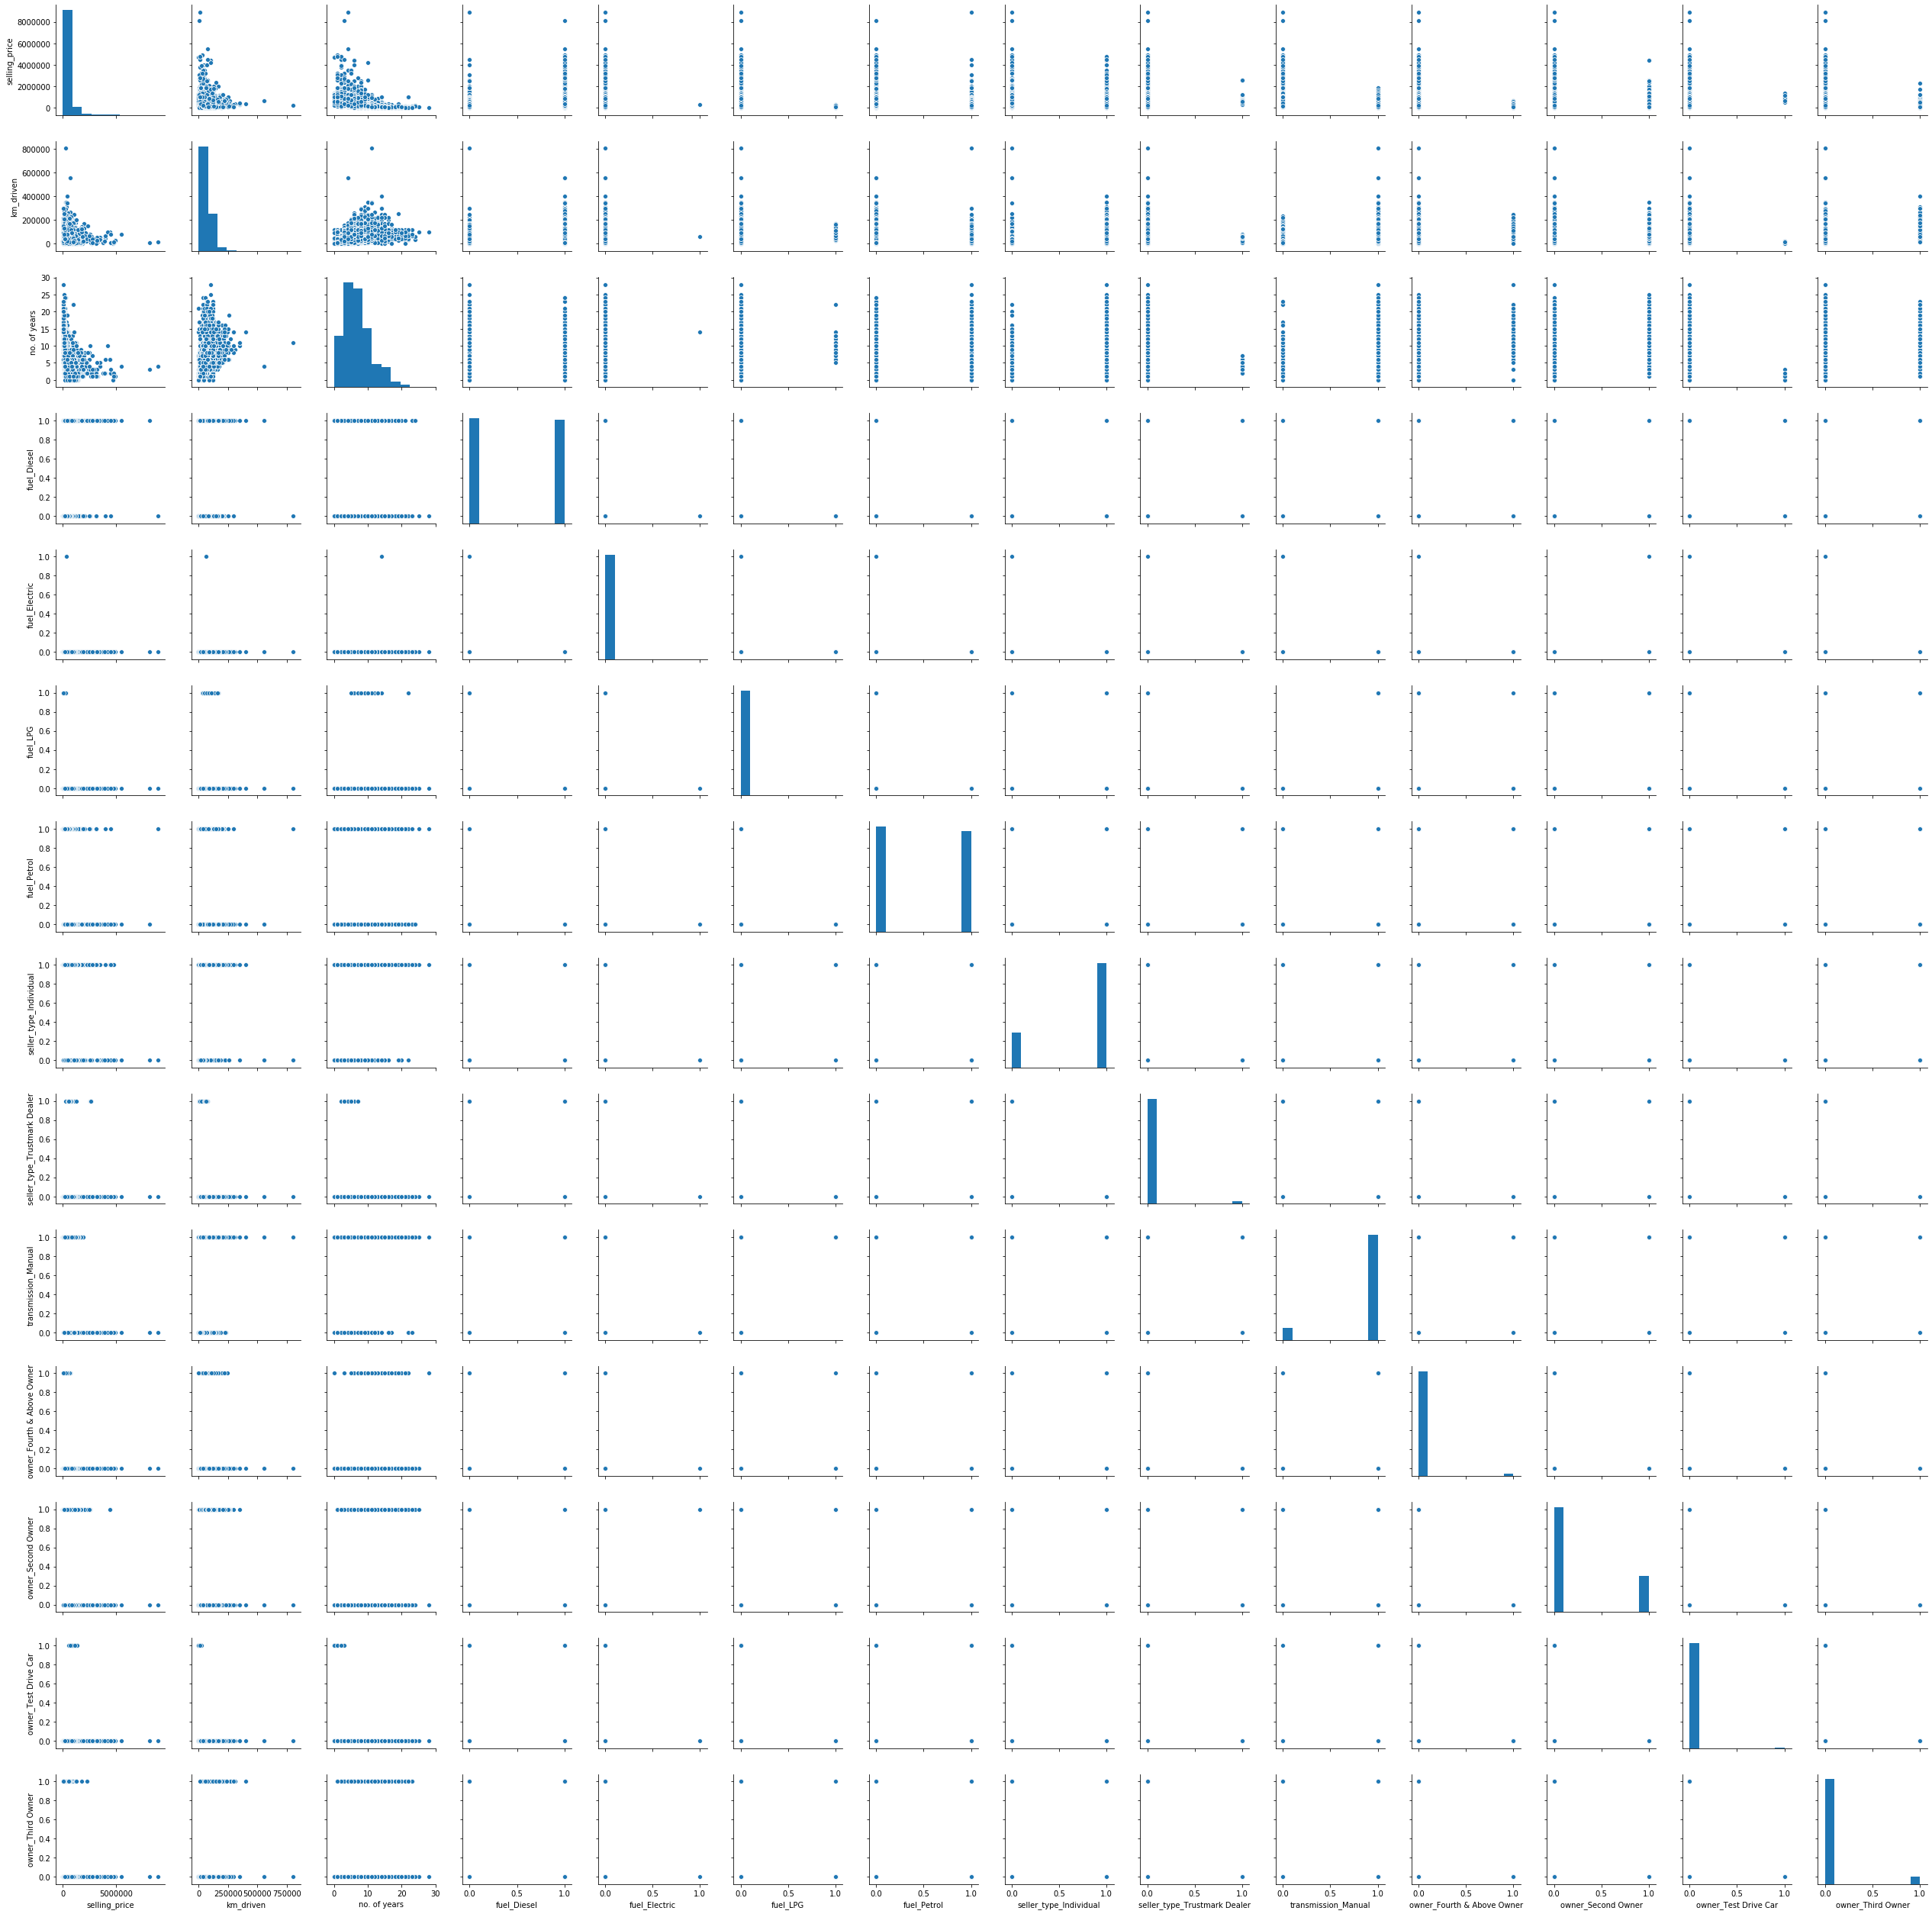

In [22]:
sns.pairplot(final_dataset)

In [23]:
import matplotlib.pyplot as plt
%matplotlib inline

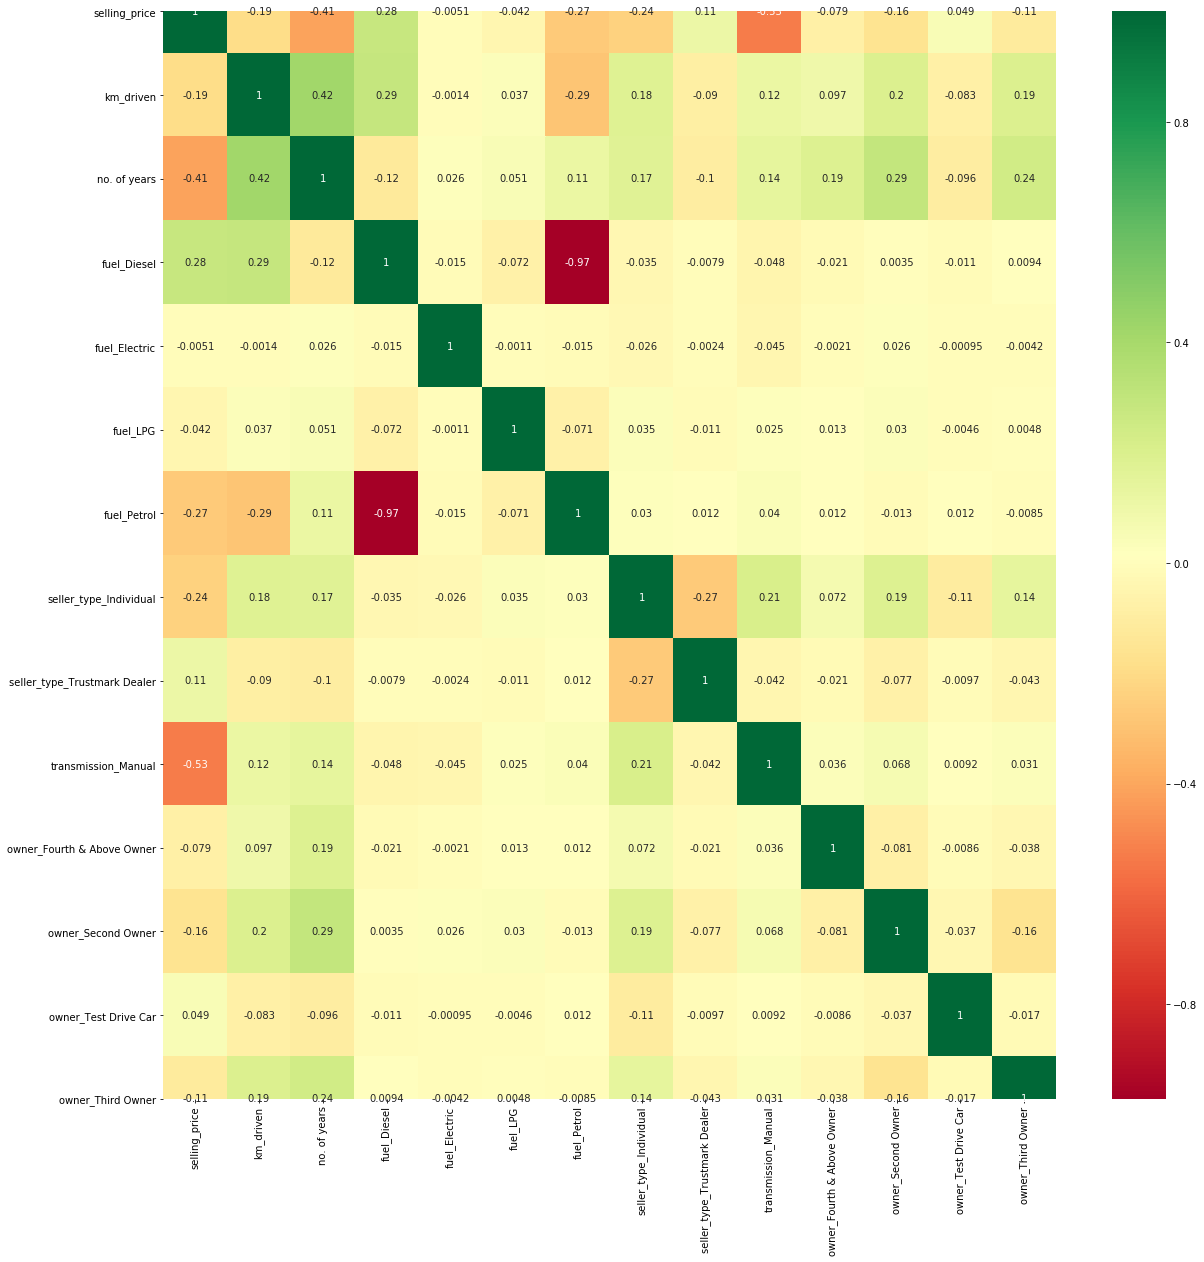

In [24]:
corrmat = final_dataset.corr()
top_corr_features = corrmat.index
plt.figure(figsize= (20,20))
# plot heat map
g = sns.heatmap(final_dataset[top_corr_features].corr(),annot= True, cmap='RdYlGn')

In [25]:
final_dataset.head()

,selling_price,km_driven,no. of years,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,60000,70000,13,0,0,0,1,1,0,1,0,0,0,0
1,135000,50000,13,0,0,0,1,1,0,1,0,0,0,0
2,600000,100000,8,1,0,0,0,1,0,1,0,0,0,0
3,250000,46000,3,0,0,0,1,1,0,1,0,0,0,0
4,450000,141000,6,1,0,0,0,1,0,1,0,1,0,0


In [26]:
## independent and dependent features
x = final_dataset.iloc[: ,1:]
y = final_dataset.iloc[ :,0]

In [27]:
x.head()

,km_driven,no. of years,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,70000,13,0,0,0,1,1,0,1,0,0,0,0
1,50000,13,0,0,0,1,1,0,1,0,0,0,0
2,100000,8,1,0,0,0,1,0,1,0,0,0,0
3,46000,3,0,0,0,1,1,0,1,0,0,0,0
4,141000,6,1,0,0,0,1,0,1,0,1,0,0


In [28]:
y.head()

0     60000
1    135000
2    600000
3    250000
4    450000
Name: selling_price, dtype: int64

In [29]:
## feature Importance
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(x,y)

C:\Users\ISHTIYAQUE HUSSAIN\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


ExtraTreesRegressor(bootstrap=False, criterion='mse', max_depth=None,
                    max_features='auto', max_leaf_nodes=None,
                    min_impurity_decrease=0.0, min_impurity_split=None,
                    min_samples_leaf=1, min_samples_split=2,
                    min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
                    oob_score=False, random_state=None, verbose=0,
                    warm_start=False)

In [30]:
print(model.feature_importances_)

[2.56155785e-01 2.42169224e-01 1.31101614e-01 4.24186349e-05
 2.56329835e-05 2.24209108e-04 4.32860816e-02 8.94630098e-03
 2.92829618e-01 9.57510245e-04 1.93257010e-02 6.81974757e-04
 4.25393058e-03]


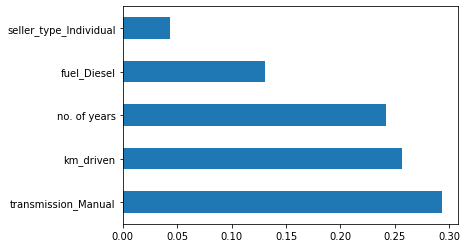

In [31]:
 ## plot graph of feature importance for better visualization
feat_importance = pd.Series(model.feature_importances_,index=x.columns)                           
feat_importance.nlargest(5).plot(kind = "barh")
plt.show()

In [32]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2)

In [33]:
x_train.shape

(3472, 13)

In [34]:
from sklearn.ensemble import RandomForestRegressor
regressor=RandomForestRegressor()

In [35]:
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
print(n_estimators)

[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200]


In [36]:
from sklearn.model_selection import RandomizedSearchCV

In [37]:
 #Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [38]:
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [39]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()

In [40]:
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [42]:
rf_random.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   3.2s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.1s remaining:    0.0s


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   2.9s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   3.1s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   2.5s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   3.2s
[CV] n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15 
[CV]  n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15, total=   4.6s
[CV] n_estimators=1100, min_samples_split=10, mi

[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.9s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.8s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.9s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.9s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.8s
[CV] n_estimators=700, min_samples_split=15, min_sam

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  2.8min finished
C:\Users\ISHTIYAQUE HUSSAIN\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators='warn',
                                                   n_jobs=None, oob_score=False,
                                                   random_sta...


In [43]:
rf_random.best_params_


{'n_estimators': 1100,
 'min_samples_split': 10,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 15}

In [51]:
rf_random.best_score_

-125283273890.60287

In [45]:
predictions = rf_random.predict(x_test)

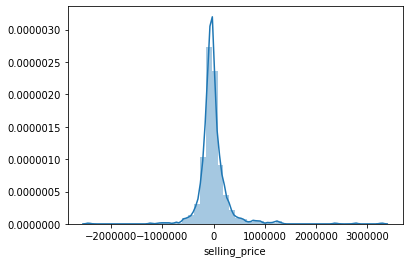

In [46]:
sns.distplot(y_test-predictions)

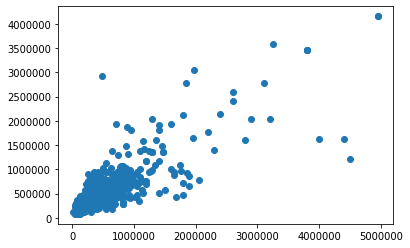

In [47]:
plt.scatter(y_test,predictions)

In [49]:
from sklearn import metrics

In [50]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 167189.43028788452
MSE: 94936998705.36154
RMSE: 308118.4816030378
